Breast Cancer DataSet Classification 
- DataSet: https://www.kaggle.com/code/esraameslamsayed/breast-cancer-classification-using-6-algorithms/input

Imports

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sns
import matplotlib.pyplot as plt
# HoldOut Validation Imports
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
#Cross Validation Imports
from sklearn.model_selection import cross_val_score, StratifiedKFold
import numpy as np

Intial load of data and display of basic information of dat 

In [32]:
# Define the path to the dataset
extract_folder_path = 'C:/Users/YourName/Documents/datasets'  

# Load the dataset
breast_df = pd.read_csv("./breast-cancer.csv")

# Display basic information and the first few rows of the dataset
dataset_description = breast_df.describe()
first_few_rows = breast_df.head()

print(dataset_description)
print(first_few_rows)

                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813     

EDA Started 

Start of Data Processing and Data Cleaning 

In [33]:
# 1. Descriptive Statistics
print("Basic Descriptive Statistics:")
print(breast_df.describe())
print("\nData Types and Missing Values:")
print(breast_df.info())

# 2. Data Cleaning
# Assuming 'id' is not relevant for analysis
df = breast_df.drop(columns=['id'])
# Check for and handle missing values (if any)
# Here we're just checking, but you should handle them according to your dataset's context
print("\nMissing values per column:")
print(df.isnull().sum())

Basic Descriptive Statistics:
                 id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0

Visulizations

 Histograms

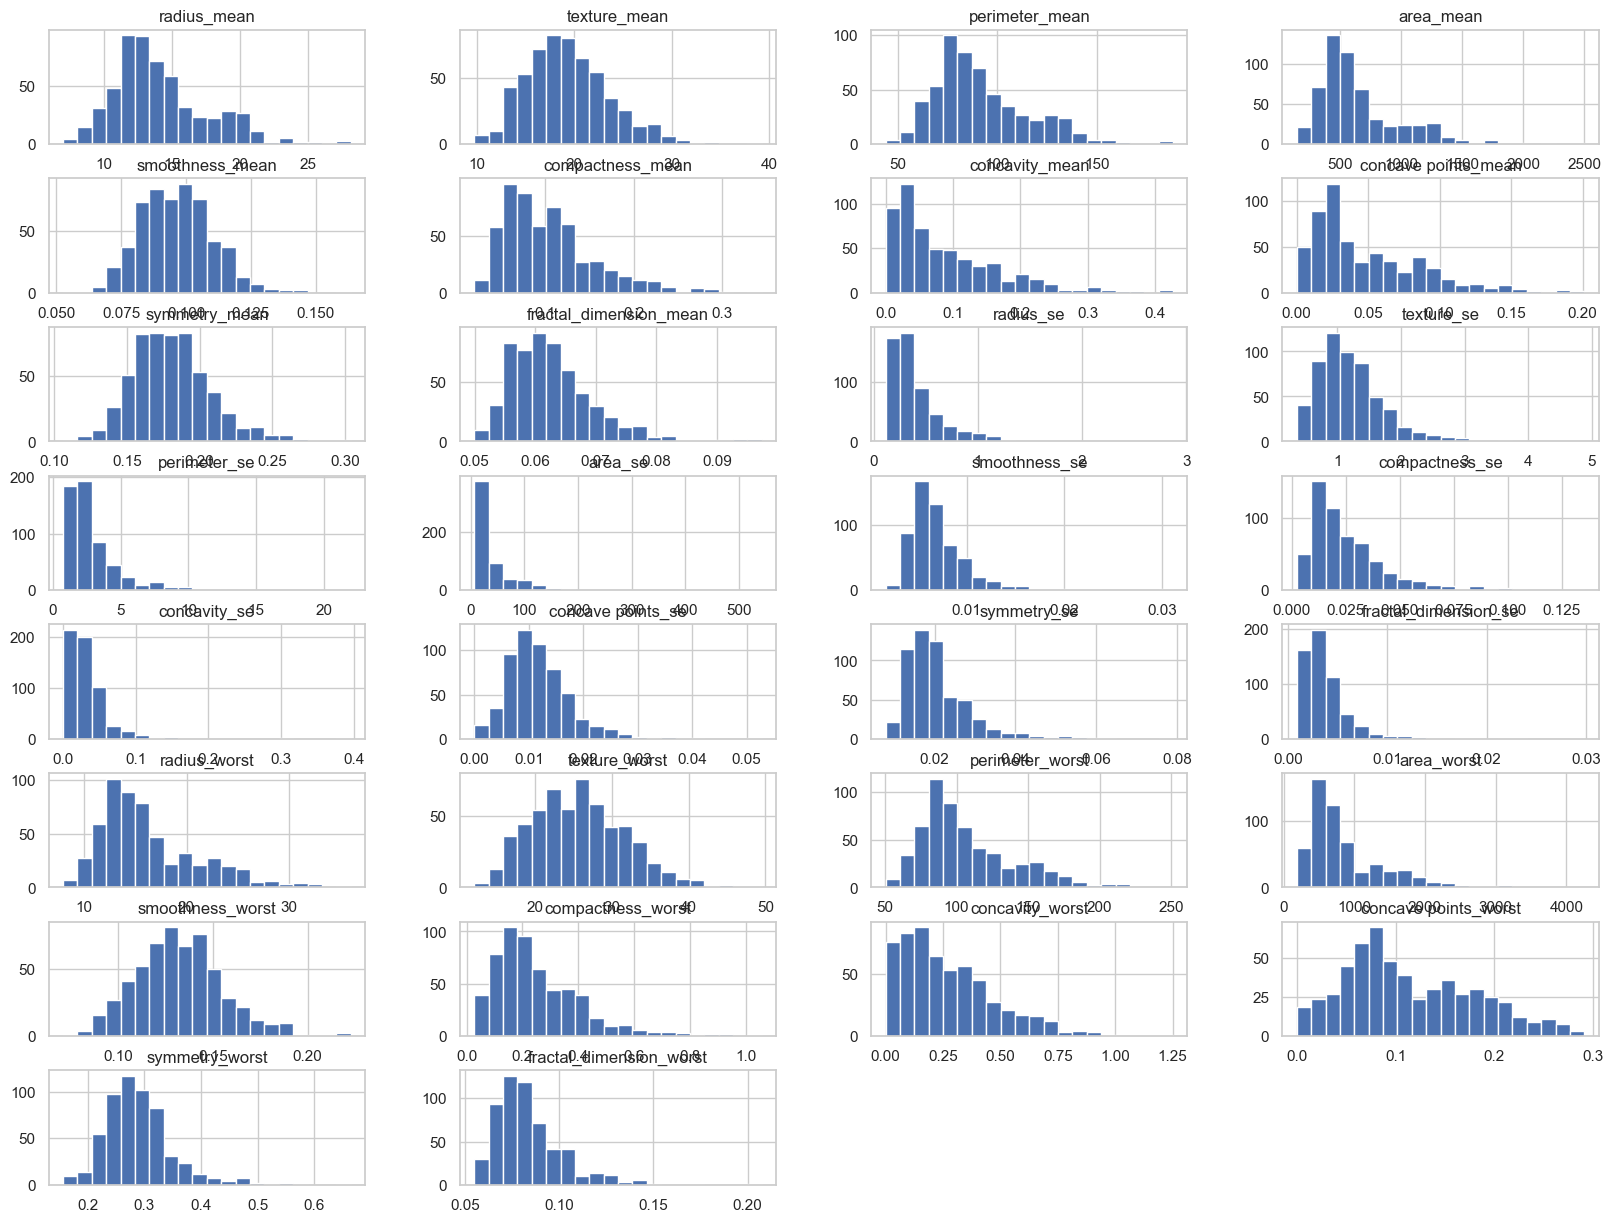

In [34]:
# 3. Data Visualization
# Histograms for each numeric attribute
df.hist(bins=20, figsize=(20, 15), layout=(8, 4))
plt.show()

Box Plot  

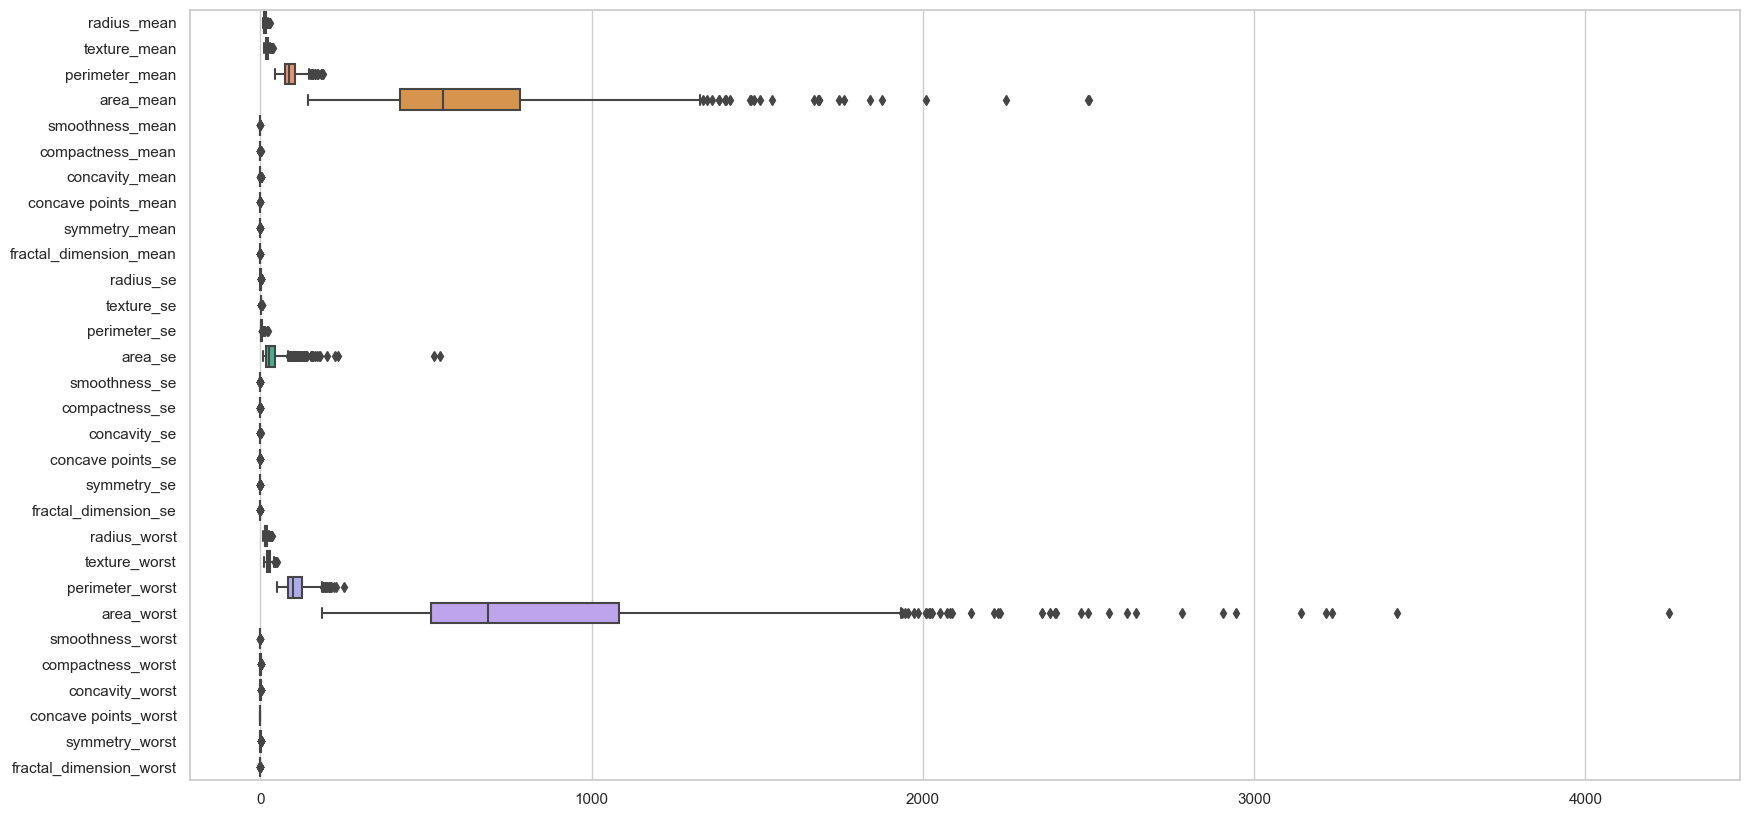

In [35]:
# Box plots for each attribute
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="h")
plt.show()


Heat Map 

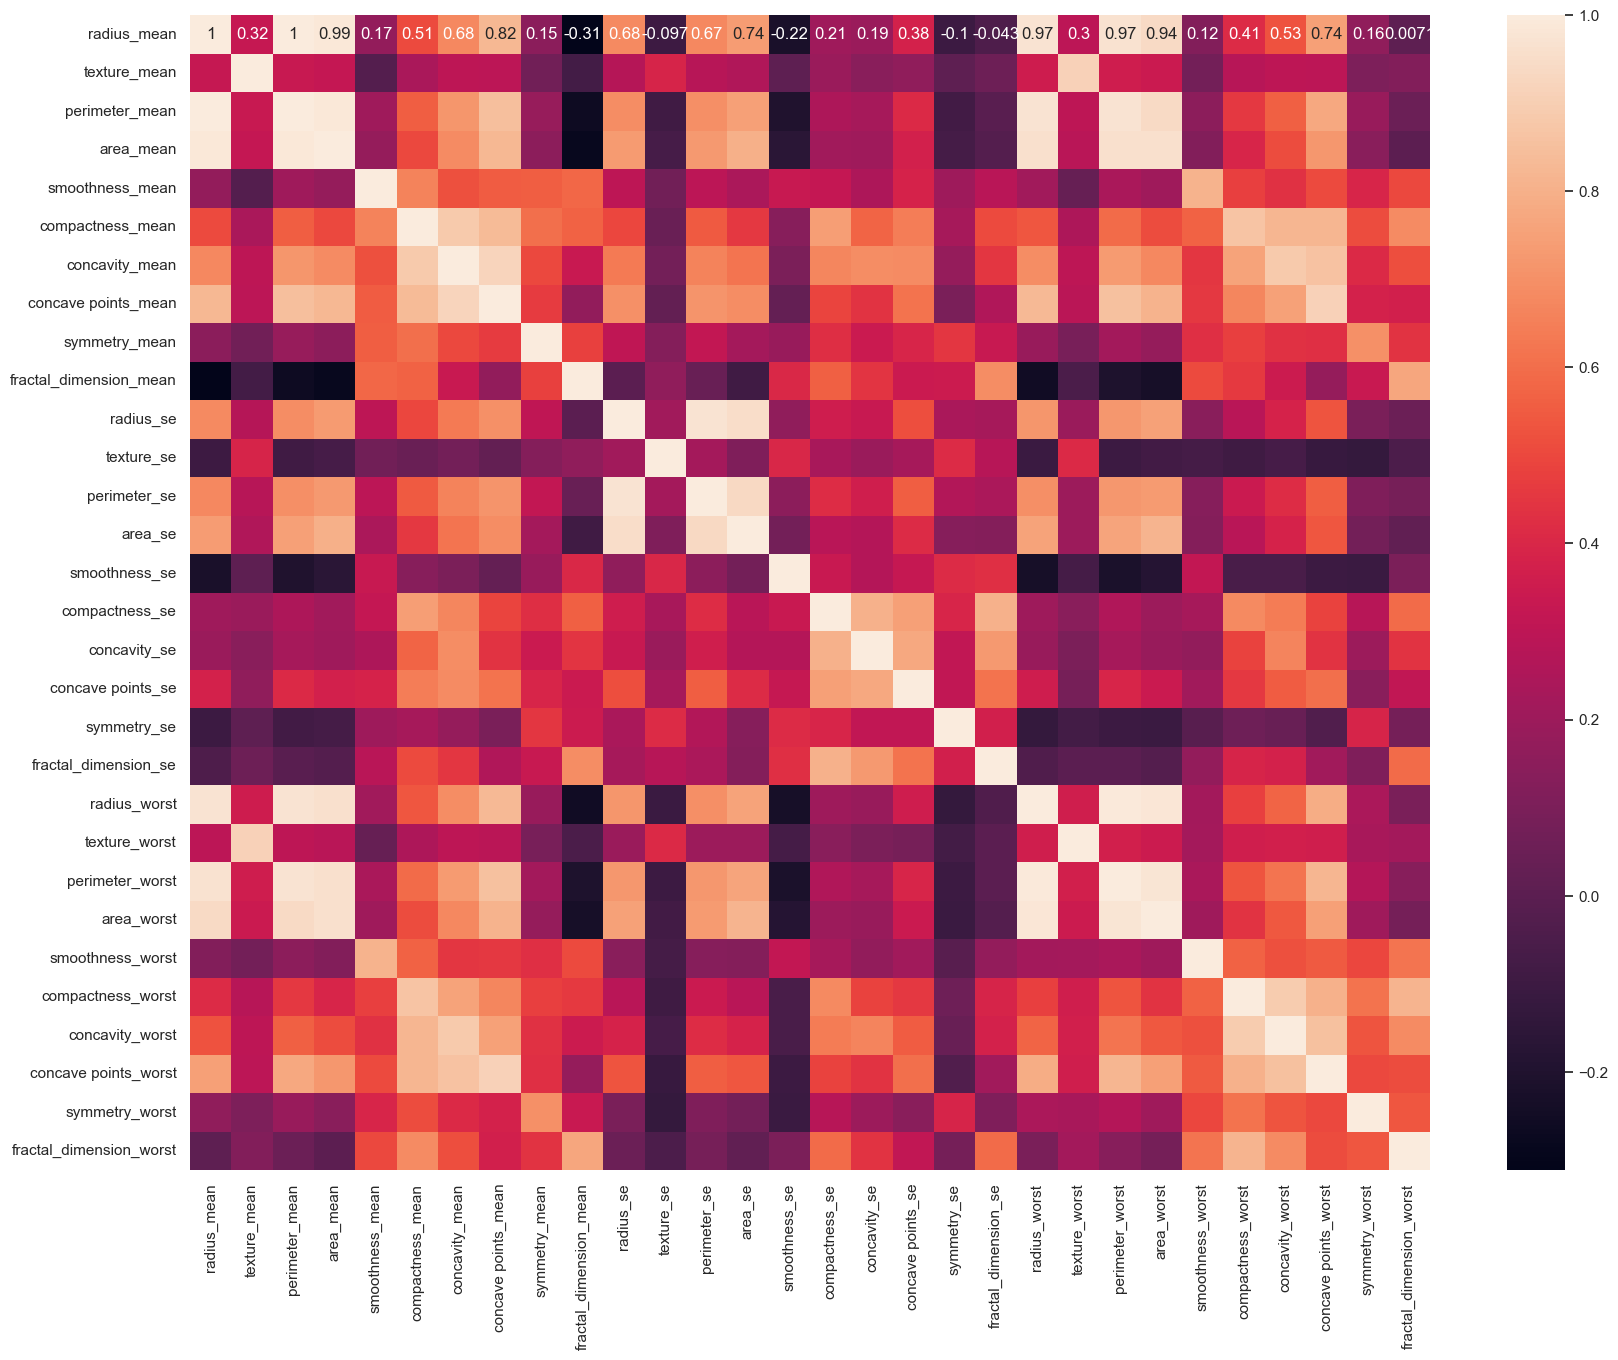

In [36]:
df_temp=df.drop(['diagnosis'],axis=1)
plt.figure(figsize=(20, 15))
sns.heatmap(df_temp.corr(), annot=True) ##visualizing relationships or patterns in a dataset
plt.show()


Correlation Charts (Scatter Plots) for more Specific Variables 

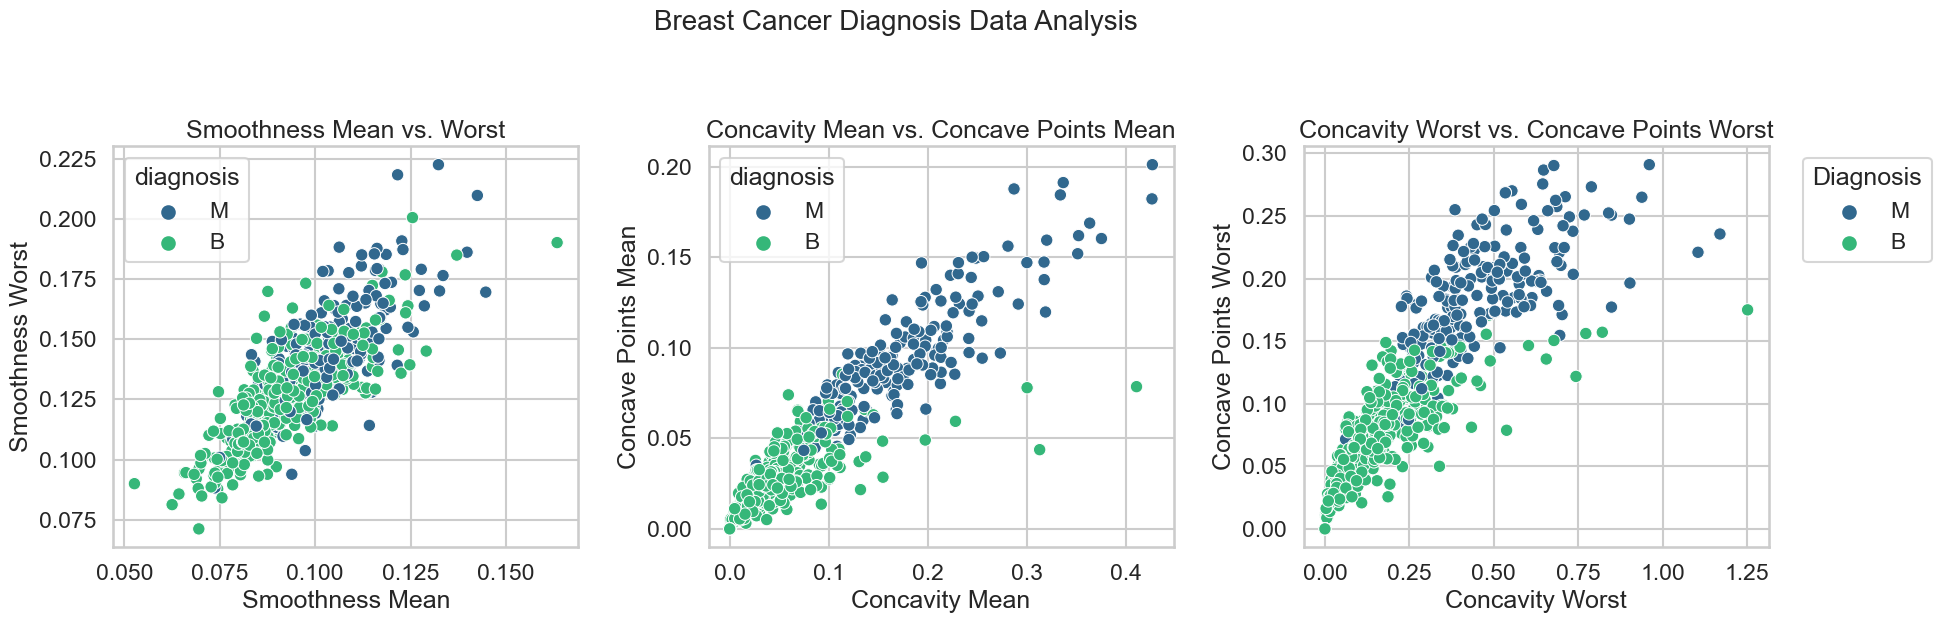

In [37]:
# Set the aesthetics for the plots
sns.set(style="whitegrid", context='talk')

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Breast Cancer Diagnosis Data Analysis', fontsize=20, y=1.05)  # Overall title

# Plot 1: Smoothness Mean vs. Smoothness Worst
sns.scatterplot(x='smoothness_mean', y='smoothness_worst', hue='diagnosis', data=df, palette='viridis', ax=axes[0], s=80)
axes[0].set_title('Smoothness Mean vs. Worst')
axes[0].set_xlabel('Smoothness Mean')
axes[0].set_ylabel('Smoothness Worst')

# Plot 2: Concavity Mean vs. Concave Points Mean
sns.scatterplot(x='concavity_mean', y='concave points_mean', hue='diagnosis', data=df, palette='viridis', ax=axes[1], s=80)
axes[1].set_title('Concavity Mean vs. Concave Points Mean')
axes[1].set_xlabel('Concavity Mean')
axes[1].set_ylabel('Concave Points Mean')

# Plot 3: Concavity Worst vs. Concave Points Worst
sns.scatterplot(x='concavity_worst', y='concave points_worst', hue='diagnosis', data=df, palette='viridis', ax=axes[2], s=80)
axes[2].set_title('Concavity Worst vs. Concave Points Worst')
axes[2].set_xlabel('Concavity Worst')
axes[2].set_ylabel('Concave Points Worst')

# Improve layout
plt.tight_layout()
plt.legend(title='Diagnosis', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Box plot for the diagnosis distribution

In [38]:
# Setting the style and size for the plot
sns.set(style="whitegrid")  
plt.figure(figsize=(8, 6))

# Creating the count plot
sns.countplot(x='diagnosis', data=df, palette='Set3')
plt.title('Distribution of Diagnosis', fontsize=20)
plt.xlabel('Diagnosis', fontsize=16)
plt.ylabel('Count', fontsize=16)

# Adding count labels above each bar
for p in plt.gca().patches:
    plt.gca().annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=14)

# Display the plot
plt.show()


HoldOut Validation 

Data Preparation:
- Load the dataset
- Split it into features (X) and the target variable (y)
- Split the data into training and testing sets

In [39]:
# Data preparation
# Load the dataset
data = pd.read_csv('./breast-cancer.csv')
X = data.drop(['id', 'diagnosis'], axis=1)  # Drop the 'id' column and the target 'diagnosis'
y = data['diagnosis'].apply(lambda x: 1 if x == 'M' else 0)  # Convert diagnosis to binary

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Model Training: 
- Train three different models
- Logistic Regression
-  Support Vector Machine (SVM)
-  Random Forest
  
All on the training set

In [40]:
# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# Initialize the models
log_reg = LogisticRegression(random_state=42)
svm = SVC(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Fit the models
log_reg.fit(X_train, y_train)
svm.fit(X_train, y_train)
random_forest.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

Model Evaluation: 
- Evaluate each model on the testing set using a set of metrics: accuracy, precision, recall, and F1-score

In [41]:
# Model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

models = [log_reg, svm, random_forest]
model_names = ['Logistic Regression', 'SVM', 'Random Forest']
metrics = {'Accuracy': accuracy_score, 'Precision': precision_score, 'Recall': recall_score, 'F1 Score': f1_score}

results = {}

for model, name in zip(models, model_names):
    y_pred = model.predict(X_test)
    results[name] = {metric: m(y_test, y_pred) for metric, m in metrics.items()}

Comparison: 
- Compare the performance of the models based on the evaluation metrics

In [42]:
# Output the results
results_df = pd.DataFrame(results).T
results_df

Accuracy  Precision    Recall  F1 Score
Logistic Regression  0.973684    0.97619  0.953488  0.964706
SVM                  0.982456    1.00000  0.953488  0.976190
Random Forest        0.964912    0.97561  0.930233  0.952381

Cross Validation

Data Preparation: 
- Load the dataset
- Split it into features (X) and the target variable (y)

In [43]:

# Load and prepare the dataset
data = pd.read_csv('./breast-cancer.csv')
X = data.drop(['id', 'diagnosis'], axis=1)
y = data['diagnosis'].map({'M': 1, 'B': 0})
# Assuming data is already loaded and preprocessed into X and y


Cross-Validation Setup: 
- Implement K-Fold cross-validation, typically using K=10 for a balance between computation time and reliability

In [44]:
# Define K-Fold cross-validation
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)


 Model Training and Evaluation: 
- For each fold in the cross-validation
- Train each model on the training set
- Evaluate it on the test set. We'll collect the performance metrics for each fold.


In [45]:
# Initialize the models
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, random_state=42),
    'SVM': SVC(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

# Define metrics for evaluation
scoring_metrics = ['accuracy', 'precision', 'recall', 'f1']

# Perform cross-validation and collect mean metrics
results = {}
for name, model in models.items():
    model_scores = {}
    for metric in scoring_metrics:
        scores = cross_val_score(model, X, y, scoring=metric, cv=kfold)
        model_scores[metric.capitalize()] = np.mean(scores)
    results[name] = model_scores


Results

In [46]:
# Create a summary DataFrame
results_df = pd.DataFrame(results).T

# Display the formatted results similar to the provided table
results_df

Accuracy  Precision    Recall        F1
Logistic Regression  0.949123   0.954399  0.909740  0.928598
SVM                  0.915633   0.962706  0.805844  0.873530
Random Forest        0.956140   0.949114  0.933550  0.939783